#Dans cette partie, nous allons prédire le pics d'ozone journalier à l’aide de ces modèles
* La régression linéaire.
* random forest
* gradient boosting.
* Les DNN

In [ ]:
# @title Importons les librairies nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.decomposition import PCA

import seaborn as sns

In [ ]:
# @title Préparation de la base de données
Ozone_data = pd.read_csv('/content/ozone_complet.csv', sep= ';')
Ozone_data.replace(',', '.', regex=True, inplace=True)

In [ ]:
Ozone_data.info()
print("================================")

print(f'Le nombre total de ligne contenant des missing value : {Ozone_data.isnull().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1464 non-null   int64  
 1   maxO3   1391 non-null   object 
 2   T6      1463 non-null   object 
 3   T9      1463 non-null   object 
 4   T12     1463 non-null   object 
 5   T15     1463 non-null   object 
 6   T18     1463 non-null   object 
 7   Ne6     1462 non-null   float64
 8   Ne9     1462 non-null   float64
 9   Ne12    1462 non-null   float64
 10  Ne15    1462 non-null   float64
 11  Ne18    1459 non-null   float64
 12  Vdir6   1463 non-null   float64
 13  Vvit6   1463 non-null   float64
 14  Vdir9   1463 non-null   float64
 15  Vvit9   1463 non-null   float64
 16  Vdir12  1463 non-null   float64
 17  Vvit12  1463 non-null   float64
 18  Vdir15  1463 non-null   float64
 19  Vvit15  1463 non-null   float64
 20  Vdir18  1463 non-null   float64
 21  Vvit18  1463 non-null   float64
 22  

**Notre base de données contient 1464 observations et 24 colonnes dont 175 variables manquantes. Les variables ne sont pas toutes en bon format. Dans la suite nous allons les convertir toutes en variables numériques**

In [ ]:
# Appliquer la conversion pour toutes les colonnes spécifiées non numériques
Ozone_data[['maxO3','T6','T9', 'T12', 'T15', 'T18','Vx', 'maxO3v']] = Ozone_data[['maxO3','T6','T9', 'T12', 'T15', 'T18','Vx', 'maxO3v']].applymap(lambda x: pd.to_numeric(x, errors='coerce')).astype(float)

In [ ]:
# @title Une petite description de la data Ozone
Ozone_data.describe()

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
count,1.464000e+03,1391.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1462.000000,1462.000000,1462.000000,...,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1391.000000
mean,1.998567e+07,85.070453,12.255913,16.349146,19.397334,20.327136,18.752905,5.010260,5.140903,5.321477,...,195.119617,3.756664,204.326726,4.531100,206.951470,4.812714,190.143541,4.401914,-0.708441,85.074623
std,2.292134e+04,23.316925,3.900193,4.112326,4.907907,5.267362,5.074725,2.913168,2.577873,2.334590,...,107.235355,1.893428,105.838169,2.066662,110.776403,2.070687,121.167570,1.761356,3.451230,23.318205
min,1.995040e+07,33.200000,-1.600000,4.500000,3.900000,5.700000,4.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.392300,33.200000
25%,1.996803e+07,68.000000,9.900000,13.800000,16.150000,16.750000,15.500000,2.000000,3.000000,4.000000,...,100.000000,2.000000,110.000000,3.000000,100.000000,3.000000,60.000000,3.000000,-3.064200,68.000000
50%,1.998567e+07,81.000000,12.600000,16.600000,19.300000,20.300000,18.600000,6.000000,6.000000,6.000000,...,210.000000,4.000000,220.000000,4.000000,230.000000,5.000000,220.000000,4.000000,-1.026100,81.000000
75%,2.000330e+07,98.000000,15.000000,19.000000,22.600000,23.900000,22.000000,8.000000,7.000000,7.000000,...,290.000000,5.000000,295.000000,6.000000,300.000000,6.000000,290.000000,6.000000,1.532100,98.000000
max,2.002093e+07,173.000000,21.700000,28.600000,33.500000,35.500000,34.100000,9.000000,9.000000,8.000000,...,360.000000,12.000000,360.000000,12.000000,360.000000,16.000000,360.000000,12.000000,10.832900,173.000000



# Traçons la distribution des variables
---



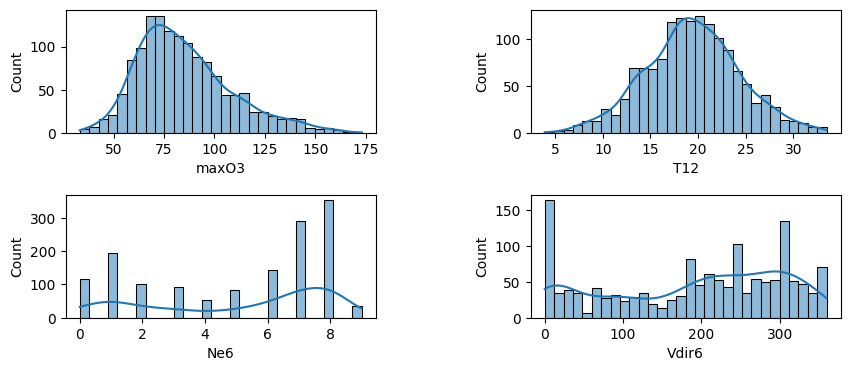

In [ ]:
# Distribution des pics d'ozone

fig, ax = plt.subplots(2, 2, figsize=(10, 4))

sns.histplot(data=Ozone_data, x='maxO3', bins=30, kde=True, ax=ax[0].flatten()[0])
# ax[0].set_title('Distribution des pics ozone')

sns.histplot(data=Ozone_data, x='T12', bins=30, kde=True, ax=ax[0].flatten()[1])
# ax[1].set_title('Distribution de la température de 12')

sns.histplot(data=Ozone_data, x='Ne6', bins=30, kde=True, ax=ax[1].flatten()[0])
# ax[2].set_title('Distribution de nébulosité observée à 06h')

sns.histplot(data=Ozone_data, x='Vdir6', bins=30, kde=True, ax=ax[1].flatten()[1])
# ax[3].set_title('Distribution de la direction du vent observée à 6h')
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

Les distributions diffèrent les une des autres en fonction des variables

**La distribution du pics d'ozone est semblable à celle d'une khi deux, donc on peut appliquer les propriété de cette loi à notre data afin d'optimiser nos modèle dans la suite.**

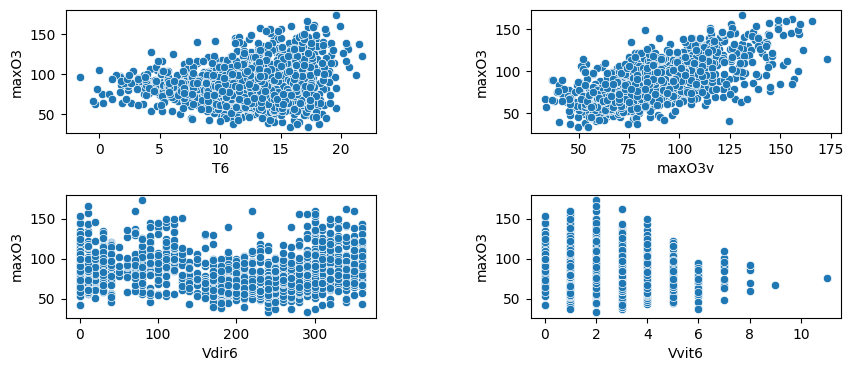

In [ ]:
# Create the subplots
fig, ax = plt.subplots(2, 2, figsize=(10, 4))

# Scatter plot the first curve
sns.scatterplot(data=Ozone_data, x='T6', y='maxO3', ax=ax[0].flatten()[0])

# Scatter plot the second curve
sns.scatterplot(data=Ozone_data, x='maxO3v', y='maxO3', ax=ax[0].flatten()[1])

# Scatter plot the second curve
sns.scatterplot(data=Ozone_data, x='Vdir6', y='maxO3', ax=ax[1].flatten()[0])

# Scatter plot the second curve
sns.scatterplot(data=Ozone_data, x='Vvit6', y='maxO3', ax=ax[1].flatten()[1])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.show()



---


**I**. En remplisant les valeurs manquantes avec la fonction mean, les modèles performent moins qu'en les supprimant. Ce n'est donc pas la meilleur methode de remplissage. Donc, nous les supprimerons dans la suite

In [ ]:
#Ozone_data.fillna(Ozone_data.mean(numeric_only=True, axis=0), inplace=True)


In [ ]:

Ozone_data.dropna(inplace=True)
types_colonnes = Ozone_data.dtypes

# Afficher les types de colonnes
# print(types_colonnes)
# Ozone_data.shape

In [ ]:
Ozone_data

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
0,19950401,47.6,10.1,11.6,13.3,13.6,12.2,8.0,8.0,8.0,...,290.0,4.0,300.0,4.0,340.0,4.0,20.0,4.0,-3.4641,62.2
1,19950402,56.2,9.5,9.4,13.8,17.4,16.3,8.0,8.0,7.0,...,160.0,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0.0000,47.6
2,19950403,61.8,3.6,8.0,16.8,21.5,20.2,4.0,5.0,2.0,...,20.0,2.0,340.0,1.0,170.0,2.0,170.0,3.0,-0.3420,56.2
3,19950404,50.8,9.5,10.5,11.4,12.2,11.4,8.0,7.0,7.0,...,10.0,4.0,350.0,3.0,350.0,3.0,350.0,4.0,-0.5209,61.8
4,19950405,59.8,9.8,10.8,13.8,14.3,13.3,8.0,7.0,8.0,...,340.0,2.0,280.0,1.0,320.0,3.0,350.0,4.0,-0.9848,50.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1459,20020926,76.0,7.0,13.7,17.0,17.9,15.3,4.0,7.0,8.0,...,290.0,4.0,330.0,5.0,330.0,6.0,330.0,3.0,-2.5000,79.0
1460,20020927,79.0,10.2,11.5,18.3,20.0,17.1,9.0,9.0,2.0,...,70.0,2.0,120.0,1.0,90.0,3.0,100.0,2.0,0.8660,76.0
1461,20020928,91.0,6.2,14.1,19.8,21.1,18.1,0.0,0.0,1.0,...,120.0,3.0,120.0,4.0,120.0,4.0,100.0,2.0,3.4641,79.0
1462,20020929,89.0,8.1,14.8,20.4,22.0,18.4,4.0,5.0,5.0,...,120.0,4.0,130.0,5.0,130.0,4.0,140.0,1.0,3.8302,91.0


<Axes: >

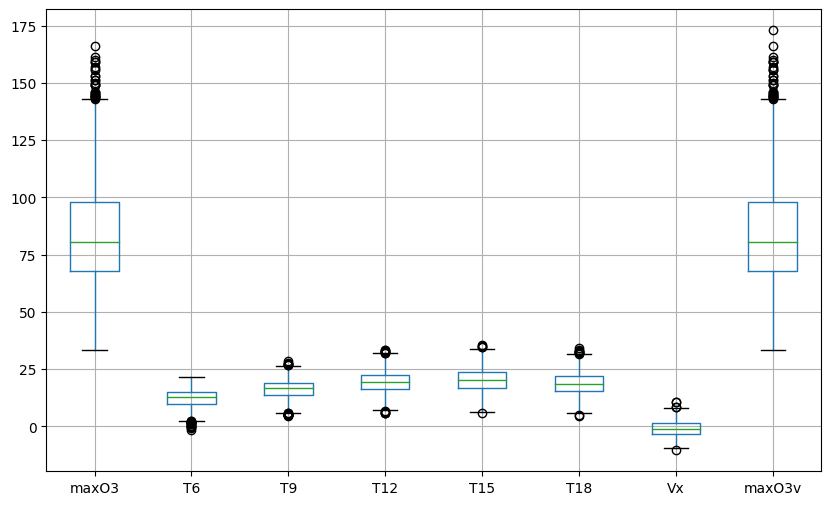

In [ ]:
plt.figure(figsize=(10, 6))
Ozone_data[['maxO3','T6','T9', 'T12', 'T15', 'T18','Vx', 'maxO3v']].boxplot()

Plusieurs varibles contient des outliers. Sans un traitement efficace, elles pénalisent la perfomances des modèles de prédictions

<Axes: >

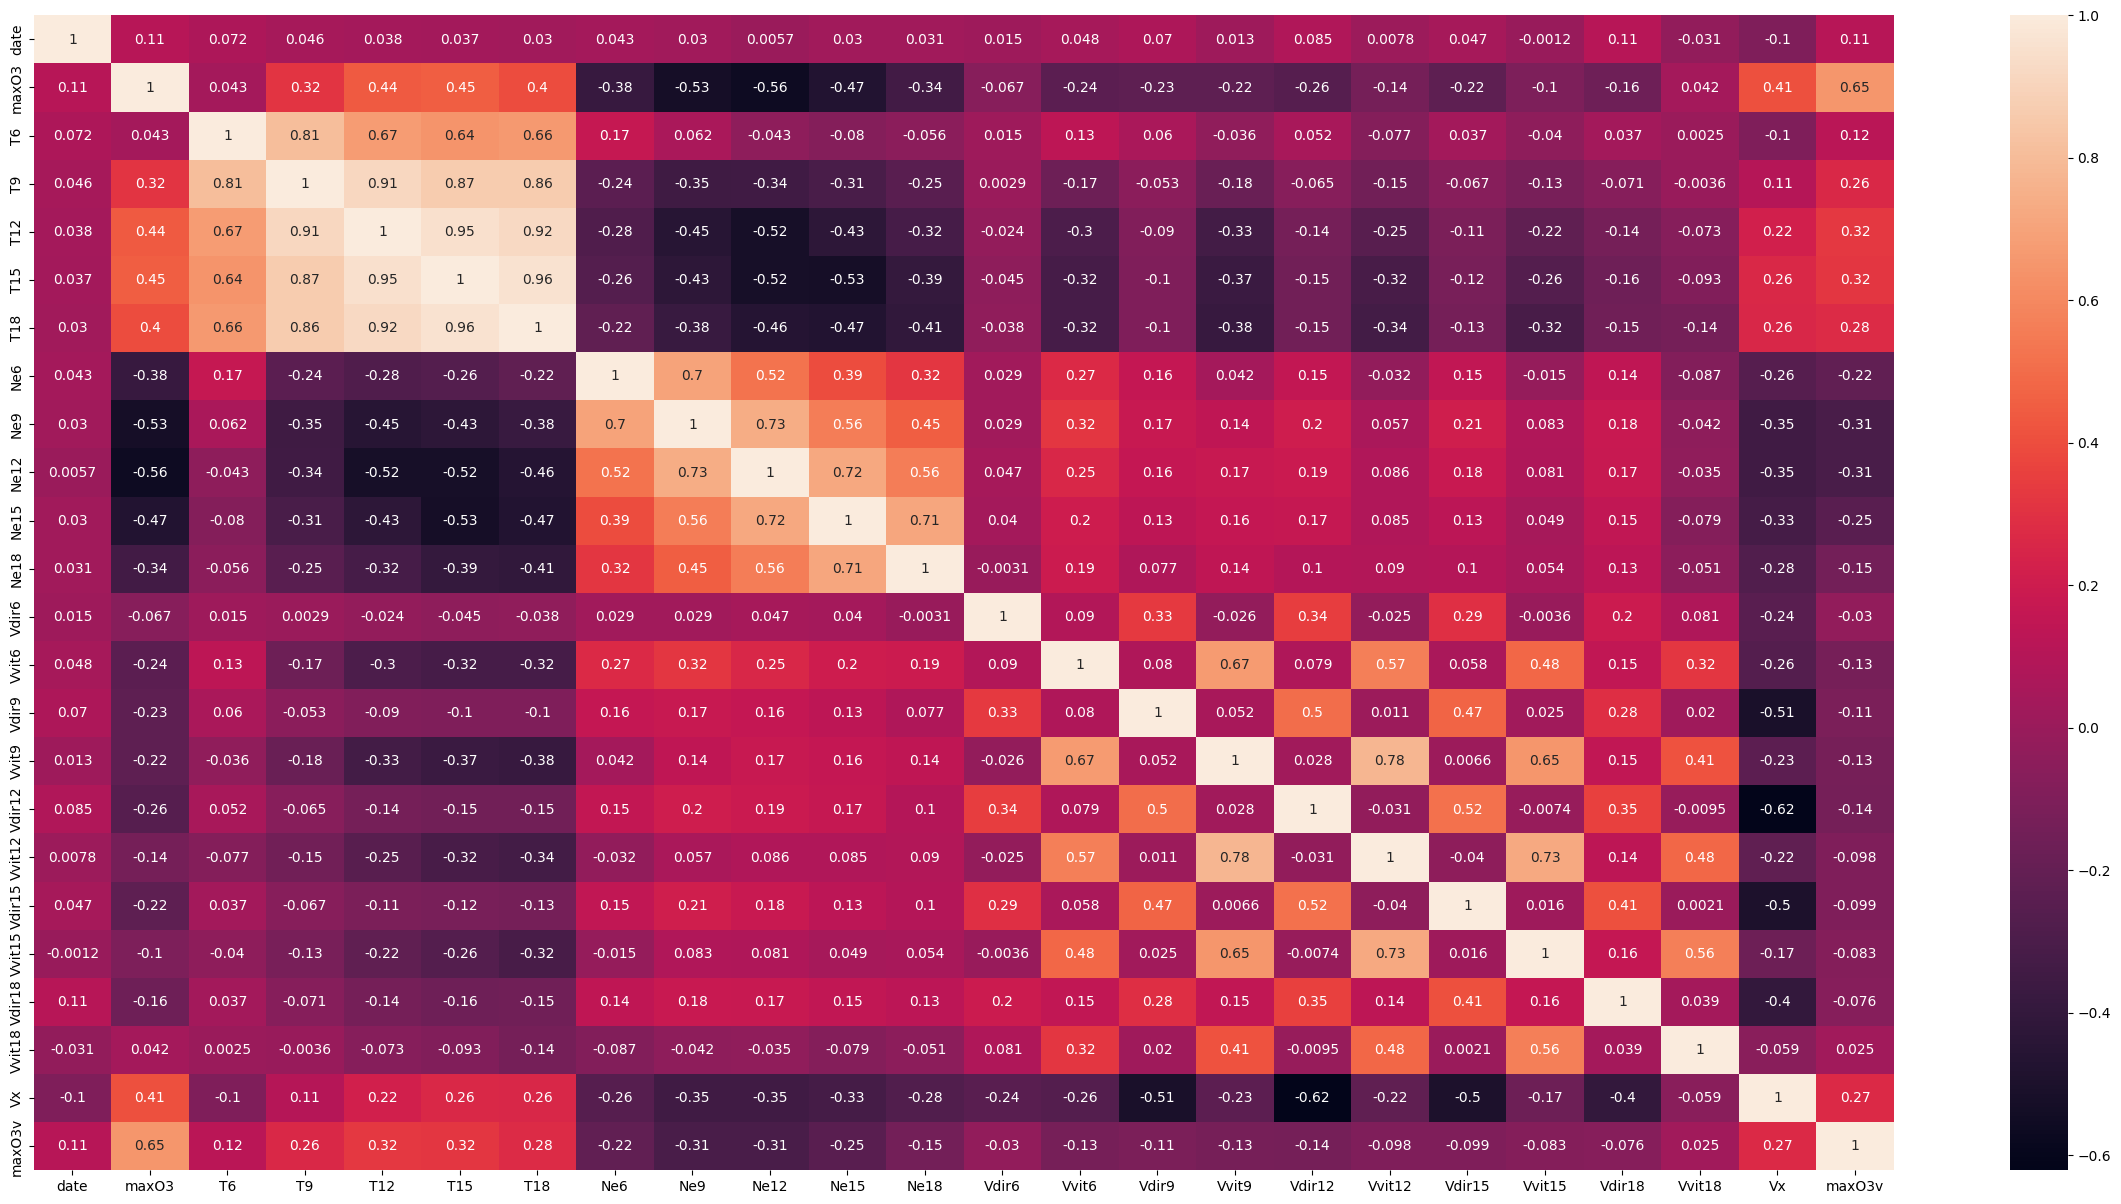

In [ ]:
## Visualisation des correlations
plt.figure(figsize=(30, 15))
sns.heatmap(Ozone_data.corr(method='spearman'), annot=True)

La table de corrélation montre que les covariables  des température sont fortement corrélées entre elles. Ce qui nous ménera à utiliser les techniques de features selections pour choisir les features qui contribuent à mieux expliquer la base de données

#Features selections

In [ ]:
#Affiche des features selon leur pertinence avec  mutual_info_regression() de sklearn
X = Ozone_data.drop('maxO3',axis=1)
y = Ozone_data['maxO3']
mi_regression_scores = mutual_info_regression(X, y)
ranked_features_indices = mi_regression_scores.argsort()[::-1]
ranked_features = X.columns[ranked_features_indices]

ranked_values = pd.Series(mi_regression_scores, index=ranked_features.values).sort_values(ascending=False)

<Axes: >

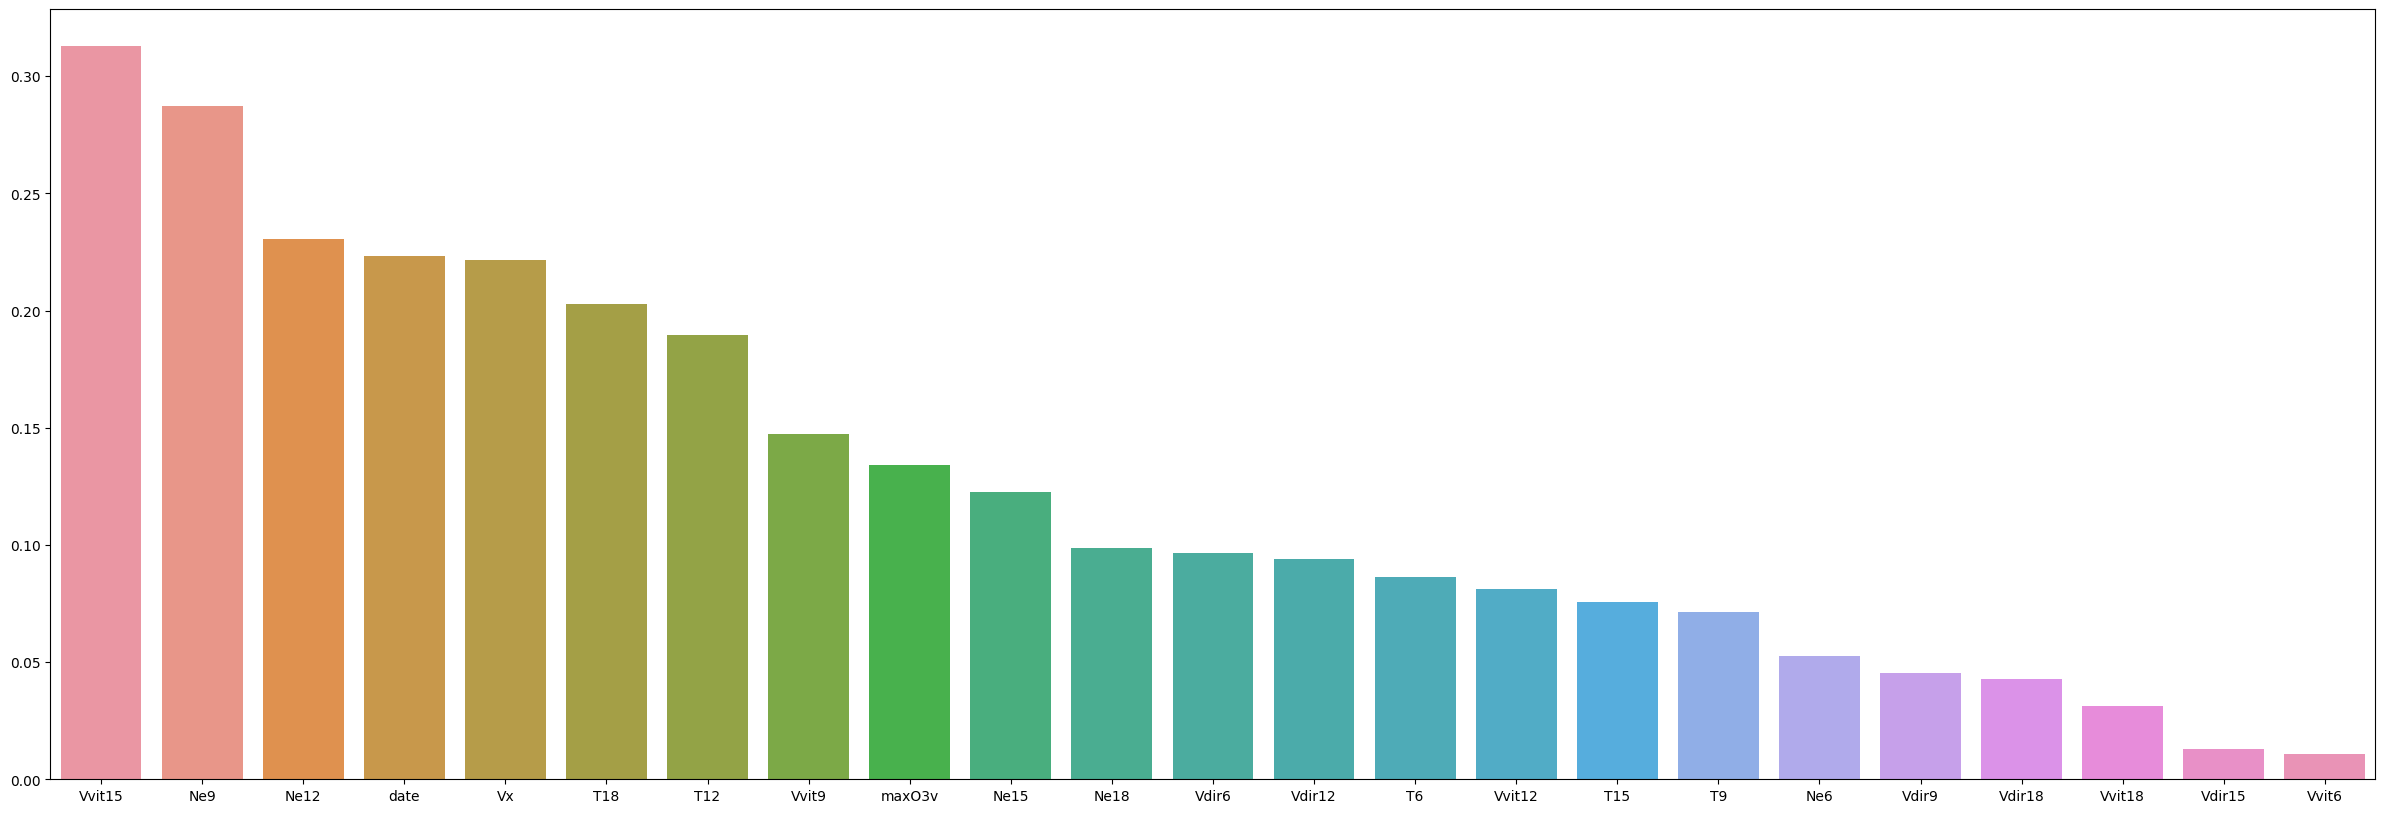

In [ ]:
plt.figure(figsize=(30, 10))
sns.barplot(x=ranked_values.index, y=ranked_values)

Classification des variables par ordre de pertinence.

# Préparation de la data pour l'entrainement

---


**Afin de tester nos modèle sur un nombres de covariable réduites, la fonction database permet de selection les K premières covaribles les plus pertinentes.**

1. Nous n'allons pas tenir compte de la variable ```date``` dans notre modèle puisque nous ne devons pas le traiter comme une valeur numéric.
2. 30% de nos données seront utilisés por l'entrainement et 70% pour l'entrainement
3. Nous allons utiliser scaler pour la normalisation de nos données

In [ ]:
scaler = StandardScaler()
def database(k):
    X = Ozone_data.drop(['maxO3'],axis=1)
    y = Ozone_data['maxO3']
    selector = SelectKBest(mutual_info_regression, k=k)
    X_top_k = selector.fit_transform(X, y)

    # Display the selected features
    selected_features = X.columns[selector.get_support()]
    X = Ozone_data[selected_features.values]
    y = Ozone_data['maxO3']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    return x_train, x_test, y_train, y_test

#Création, test et sélection du meilleur modèle parmi La *régression linéaire*, *random forest*, *gradient boosting* en vairant le nombre de covarible choisi dans k=[10, 15, 20, 22]

---

**Ici tous les modèles serons testé sur les différentes base de données pour justifier le choix de nos covariables et après  ccette session, nous visualiserons les resultats des modèles indépendemment les uns des autres en utilisant le nombre de covariables rétenu, ajouter des paramètres à certains modèles pour observer l'influence de ces paramèmetres**

In [ ]:
my_model = [LinearRegression(), RandomForestRegressor(random_state=42), GradientBoostingRegressor(random_state=42)]
k=[10, 15, 20, 22]
for i in k:
    print(f"Nombre features choisis {i}\n")
    for md in my_model:
      x_train, x_test, y_train, y_test = database(i)
      model = md
      model.fit(x_train, y_train)

      y_pred = model.predict(x_test)
      mse = np.sqrt(mean_squared_error(y_test, y_pred))
      mae = mean_absolute_error(y_test, y_pred)
      print(f'{md.__class__.__name__} R_MSE: {mse} || MAE: {mae} || R_squared : {r_squared}')
    print('\n')


Nombre features choisis 10

LinearRegression R_MSE: 14.362344547941463 || MAE: 11.275072632568282 || R_squared : 0.7135505378233851
RandomForestRegressor R_MSE: 13.850339498876782 || MAE: 10.570595121951218 || R_squared : 0.7135505378233851
GradientBoostingRegressor R_MSE: 13.290653820259582 || MAE: 9.919332732778317 || R_squared : 0.7135505378233851


Nombre features choisis 15

LinearRegression R_MSE: 14.484348234154059 || MAE: 11.36033604294707 || R_squared : 0.7135505378233851
RandomForestRegressor R_MSE: 13.560604807362518 || MAE: 10.197878048780488 || R_squared : 0.7135505378233851
GradientBoostingRegressor R_MSE: 13.243523875372377 || MAE: 9.923137422939089 || R_squared : 0.7135505378233851


Nombre features choisis 20

LinearRegression R_MSE: 14.005608211168578 || MAE: 10.85458209010294 || R_squared : 0.7135505378233851
RandomForestRegressor R_MSE: 13.490412063713265 || MAE: 10.154999999999998 || R_squared : 0.7135505378233851
GradientBoostingRegressor R_MSE: 13.029401000693364

Parmi les modèles précédents, le modèle le plus performant est le **GradientBoostingRegressor** avec 22 covariables,  Root mean squared error = 13,01; mean absolute error = 9,77 et R_square = 0,71

#Visualisons la prédiction par rapport à la valeur réelle (y réel) pour les modèles *RandomForestRegressor* et *GradientBoostingRegressor* avec toutes les 22 covariables en ajoutant des paramètre à nos modèles pour observer leurs comportements

In [ ]:
# @title RandomForestRegressor
x_train, x_test, y_train, y_test = database(22)

best_params = {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}

# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.set_params(**best_params)

rf_model.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
rf_y_pred = rf_model.predict(x_test)

# Évaluation du modèle
rf_mse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_mae = mean_absolute_error(y_test, rf_y_pred)

print(f'RandomForestRegressor RMSE: {rf_mse} || MAE: {rf_mae}')

RandomForestRegressor RMSE: 13.329491014426818 || MAE: 10.004216247120086


Les paramètres ont été choisis après un parcours dans

```python
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 10, 20],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}
```

Et nous remarquons que le modèle n'a pas réalisé une grande amélioration

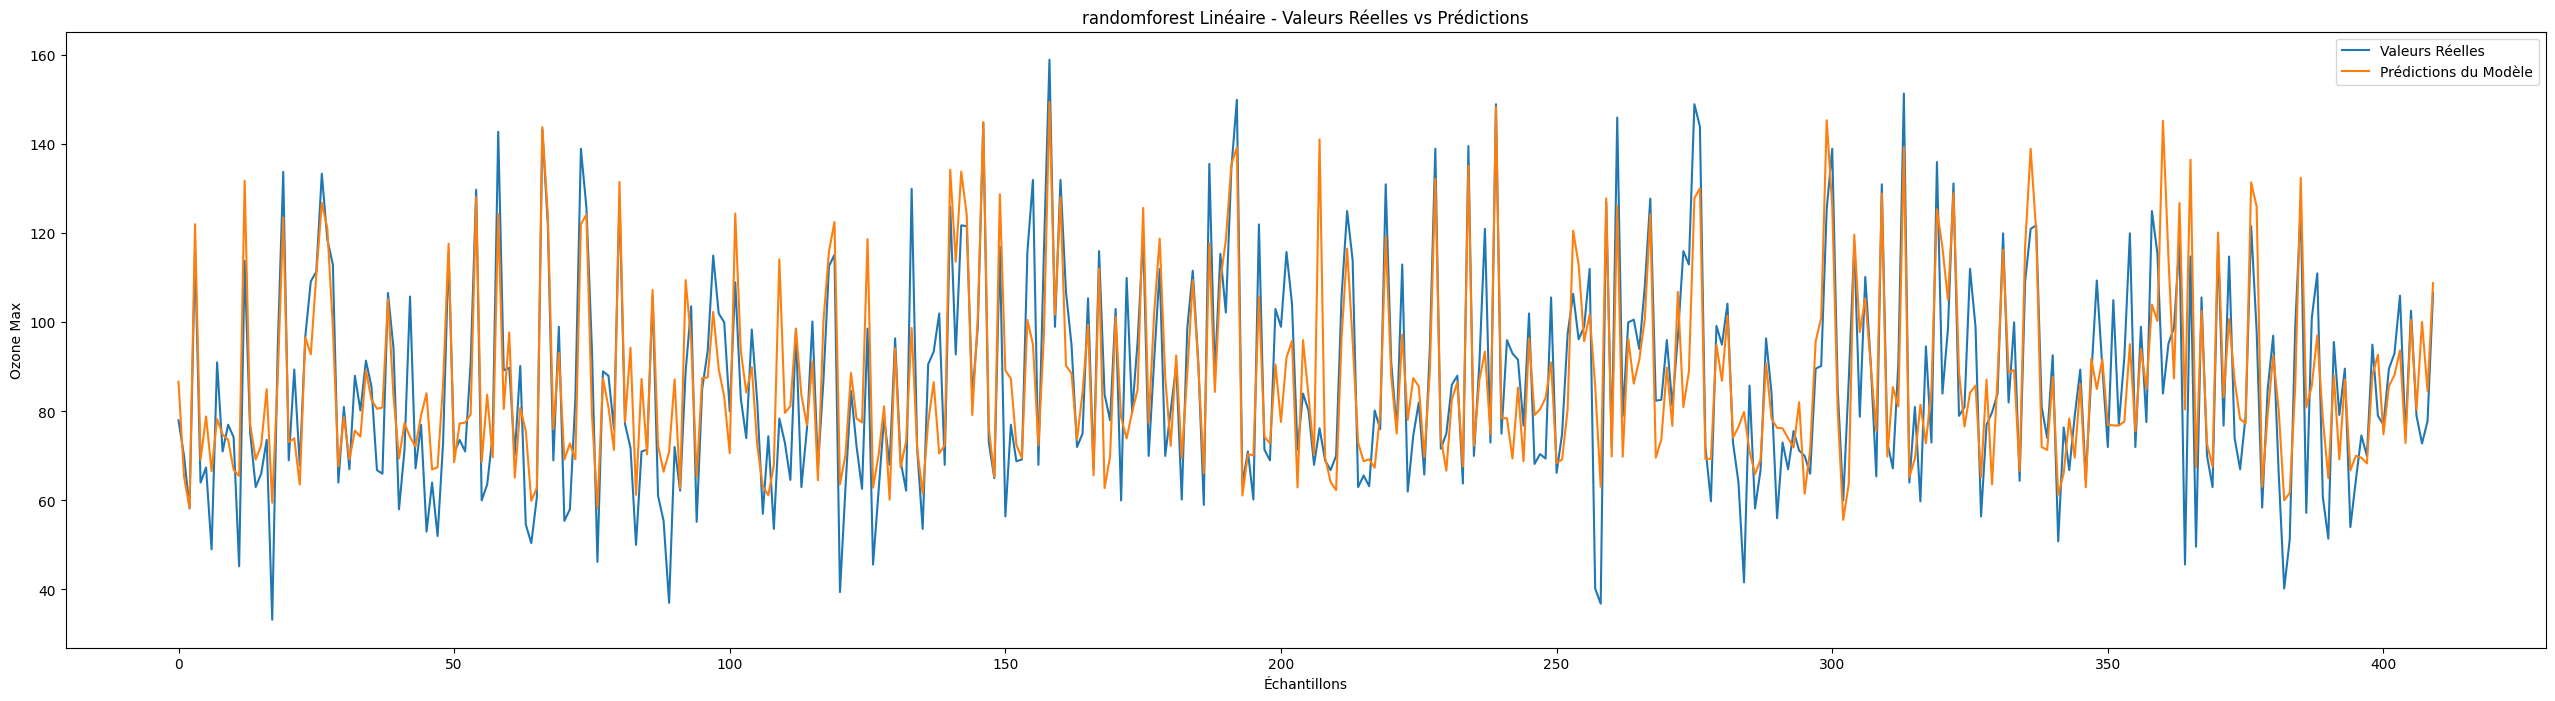

In [ ]:
# Visualiser les prédictions par rapport aux vraies valeurs
plt.figure(figsize=(32, 8))

# Courbe des valeurs réelles
plt.plot(y_test.values, label='Valeurs Réelles')

# Courbe des prédictions
plt.plot(rf_y_pred, label='Prédictions du Modèle')

plt.xlabel('Échantillons')
plt.ylabel('Ozone Max')
plt.title('randomforest Linéaire - Valeurs Réelles vs Prédictions')
plt.legend()
plt.show()

In [ ]:
# @title Gradient Boosting
# Gradient Boosting

x_train, x_test, y_train, y_test = database(22)

best_params = {'learning_rate': 0.1,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50,
 'subsample': 0.8}

gb_model = GradientBoostingRegressor(random_state=42)

gb_model.set_params(**best_params)
gb_model.fit(x_train, y_train)

# Prédictions sur l'ensemble de test
gb_y_pred = gb_model.predict(x_test)

# Évaluation du modèle
gb_mse =np.sqrt(mean_squared_error(y_test, gb_y_pred))
gb_mae = mean_absolute_error(y_test, gb_y_pred)
print(f'Gradient Boosting RMSE: {gb_mse} MAE: {gb_mae}')

Gradient Boosting RMSE: 12.99364903761483 MAE: 9.97590967855731


Avec la recherche de paramètre

```python
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}
```  
nous avons les parèmetre utilisés.

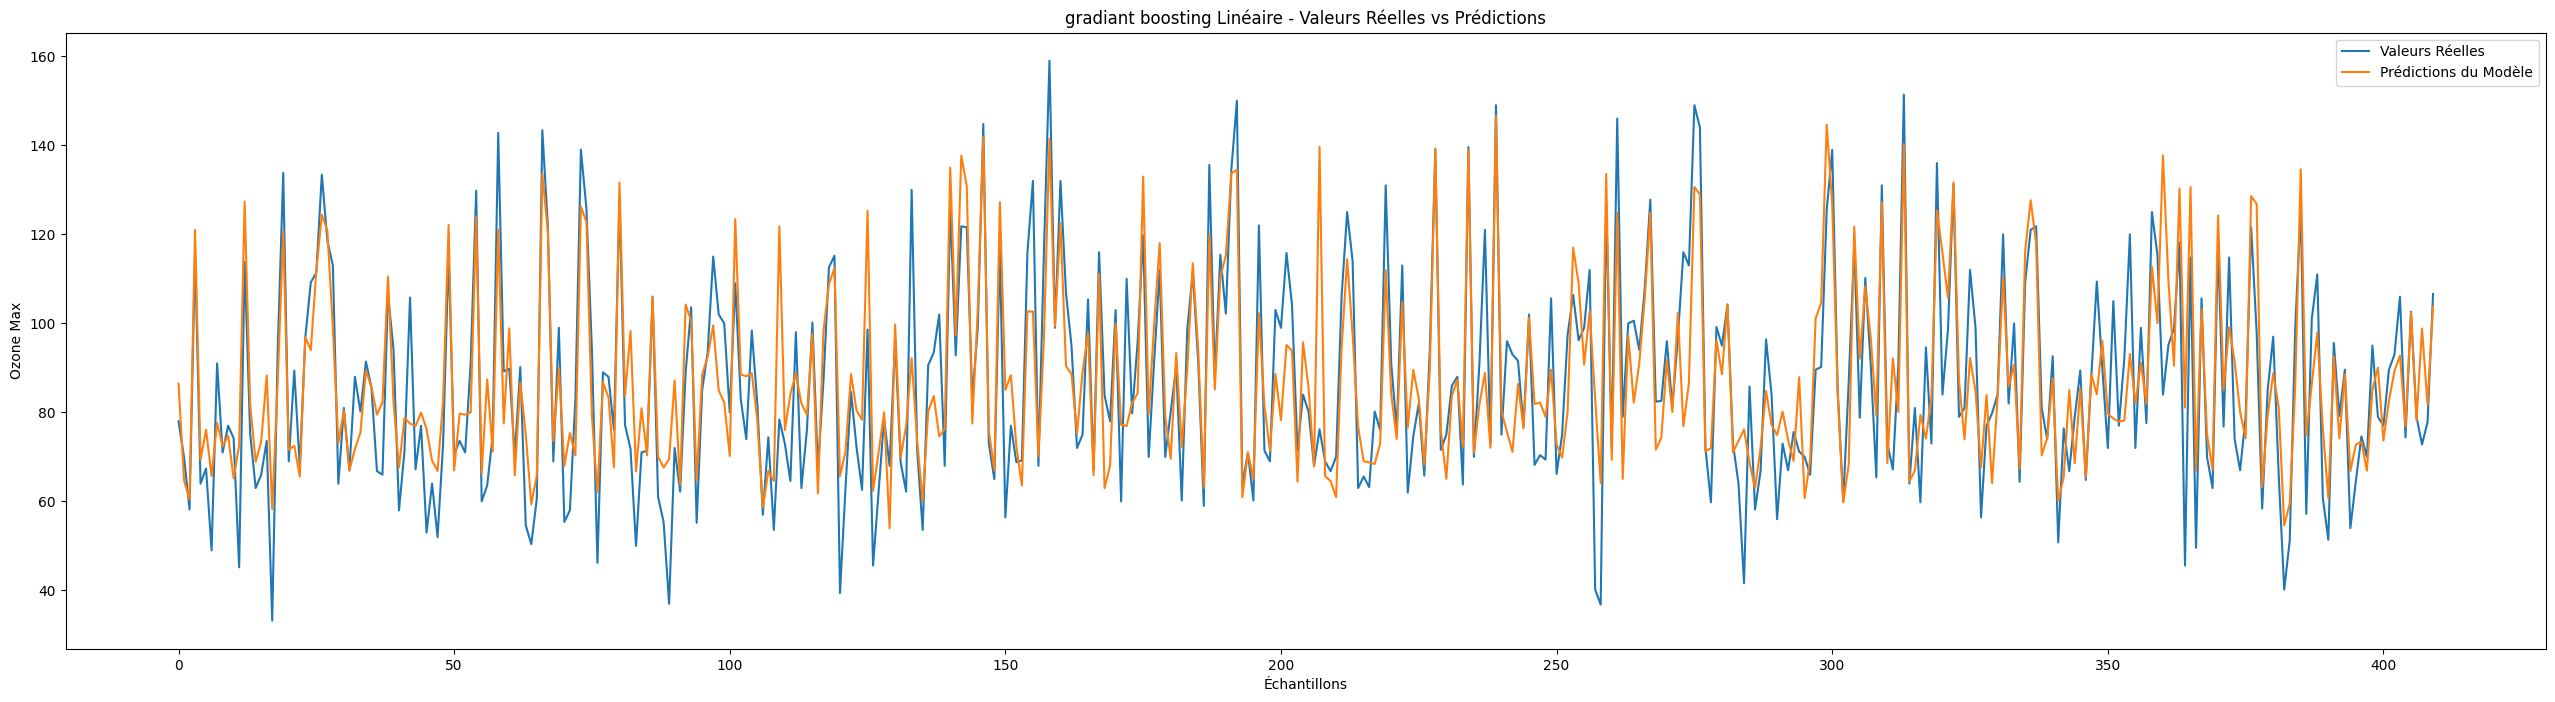

In [ ]:
# Visualiser les prédictions par rapport aux vraies valeurs
plt.figure(figsize=(32, 8))

# Courbe des valeurs réelles
plt.plot(y_test.values, label='Valeurs Réelles')

# Courbe des prédictions
plt.plot(gb_y_pred, label='Prédictions du Modèle')

plt.xlabel('Échantillons')
plt.ylabel('Ozone Max')
plt.title('gradiant boosting Linéaire - Valeurs Réelles vs Prédictions')
plt.legend()
plt.show()

#Nous allons implémenter ici un DNN avec deux couches cachées.

1. La première couche cachée comportait 32 neurones avec une activation ReLU, suivie de d'une autres couches cachées avec respectivement 64 neurones. La couche de sortie contient un seul neuronne avec une activation linear.

2.  Nous avons utilier le mean_square_error comme critère d'erreur et l'optimizer d'Adam.

3. Le Batch = 80 et epochs = 32 ont été utilisé et une division de (X_train, Y_train) à 80% pourl'entrainement et 20% pour la validation

In [ ]:
X1 = Ozone_data.drop(['date', 'maxO3'], axis = 1)
y1 = Ozone_data['maxO3']

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

In [ ]:
# Création du modèle
A_model = Sequential()

# Ajout des couches
A_model.add(Dense(64, input_dim=x1_train.shape[1], activation='relu', name = "Hidden_layer1"))  # Couche d'entrée avec 64 caractéristiques, couche cachée avec 64 neurones


A_model.add(Dense(256, activation='relu', name = "Hidden_layer2"))  # Autre couche cachée avec 32 neurones

A_model.add(Dense(1, activation='linear', name='Output_layer'))  # Couche de sortie avec activation sigmoïde pour la classification binaire

A_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_layer1 (Dense)       (None, 64)                1472      
                                                                 
 Hidden_layer2 (Dense)       (None, 256)               16640     
                                                                 
 Output_layer (Dense)        (None, 1)                 257       
                                                                 
Total params: 18369 (71.75 KB)
Trainable params: 18369 (71.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compilation du modèle
A_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [ ]:
# Entraînement du modèle
hist = A_model.fit(np.array(x1_train), np.array(y1_train), epochs=50, batch_size=32, validation_split=0.2, verbose=0)

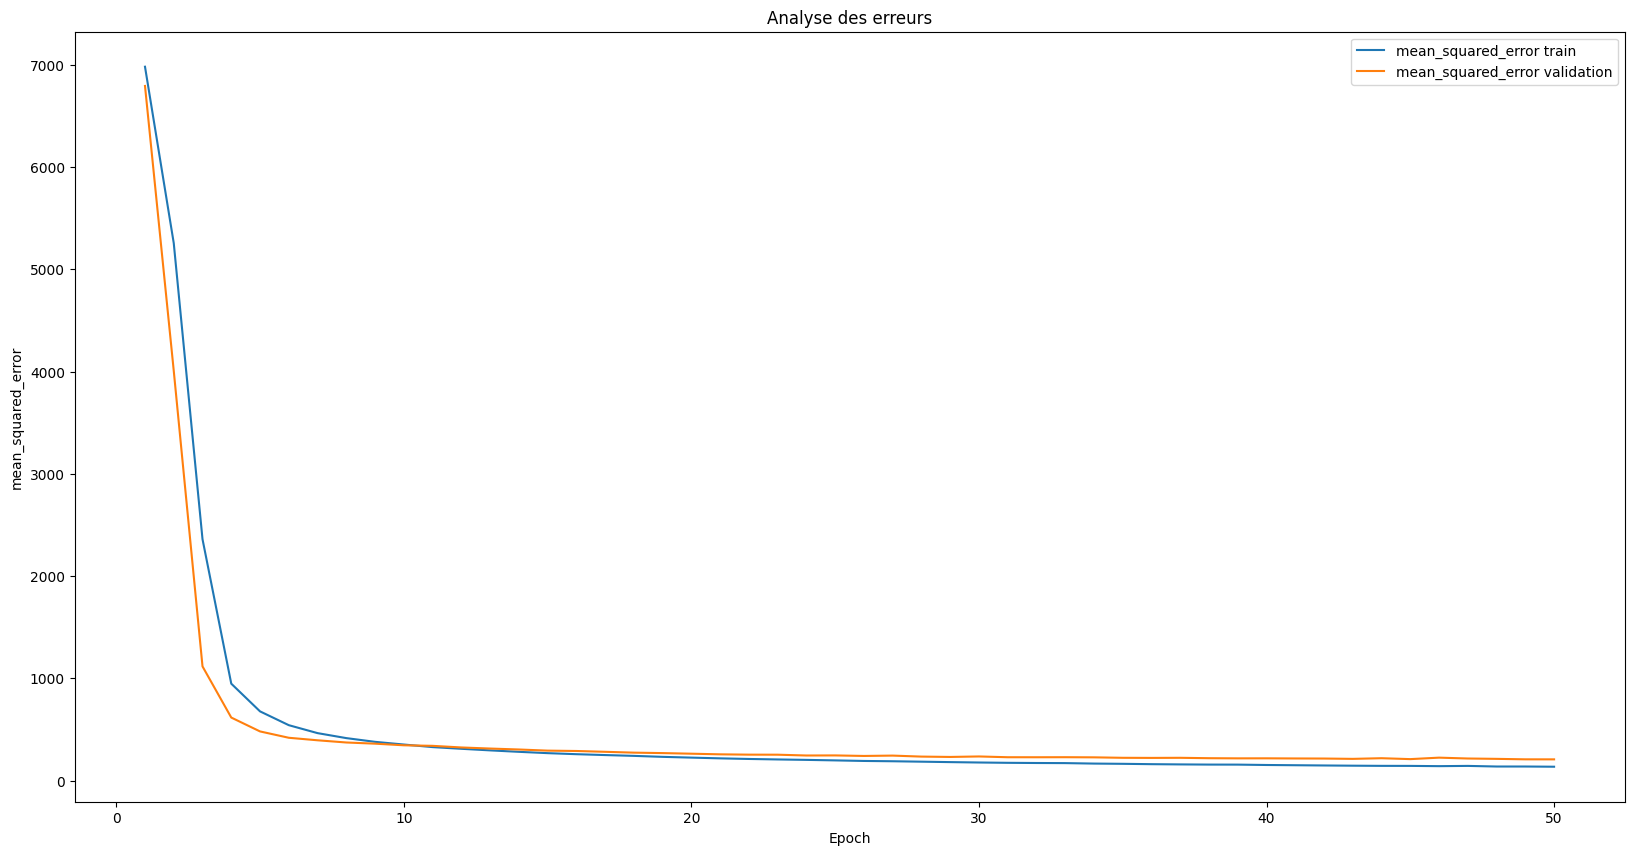

In [ ]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Analyse des erreurs')
plt.xlabel('Epoch')
plt.ylabel('mean_squared_error')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['mean_squared_error train', 'mean_squared_error validation'])
plt.show()

In [ ]:
# Obtenez les prédictions du modèle sur les données de test
y_pred = A_model.predict(x1_test)

# Calculez l'erreur quadratique moyenne (MSE) pour évaluer la performance du modèle
DNN_rmse = np.sqrt(mean_squared_error(y1_test, y_pred))
mae_DNN = mean_absolute_error(y1_test, y_pred)

print(f'DNN_RMSE: {DNN_rmse} || DNN_MAE: {mae_DNN} ')


13/13 [==============================] - 0s 2ms/step
DNN_RMSE: 14.918826657761986 || DNN_MAE: 11.552503526268936 


In [ ]:
print(f'R_square: {r2_score(y1_test, y_pred)}')

R_square: 0.634129789777064


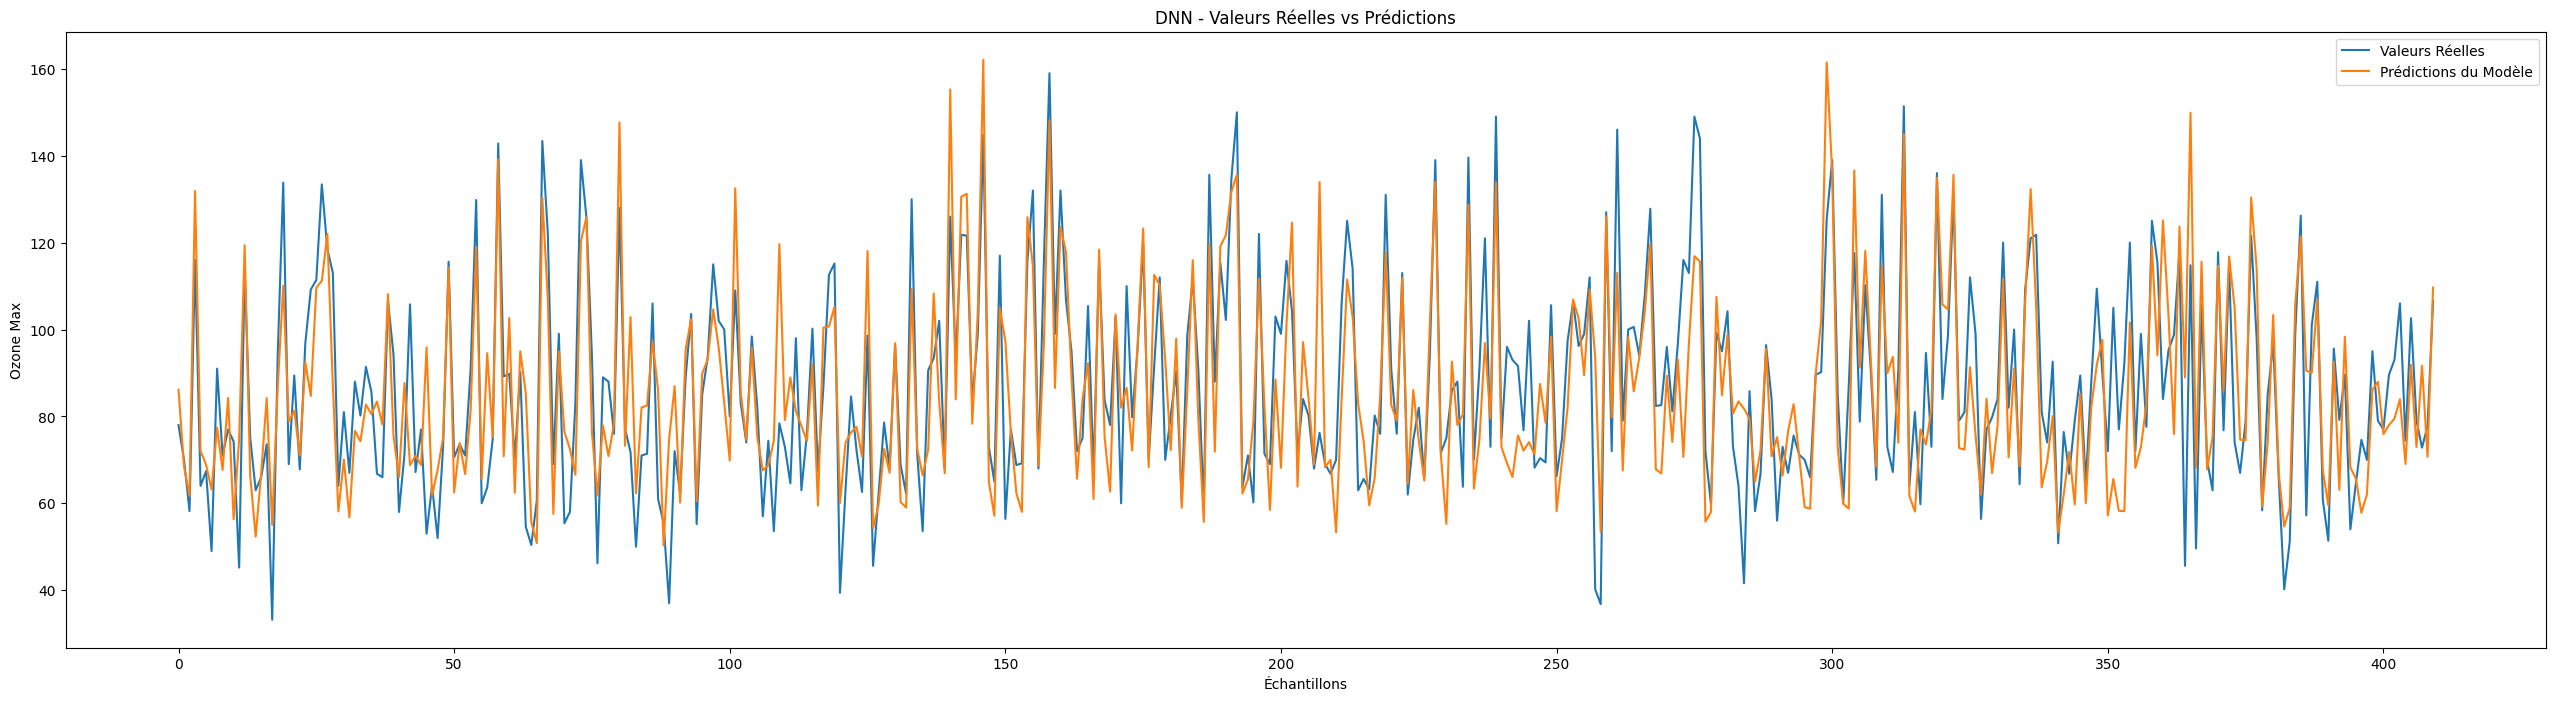

In [ ]:
# Visualiser les prédictions par rapport aux vraies valeurs
plt.figure(figsize=(32, 8))

# Courbe des valeurs réelles
plt.plot(y1_test.values, label='Valeurs Réelles')


x = np.linspace(0, 100, 1000)

# Courbe des prédictions
plt.plot(y_pred, label='Prédictions du Modèle')


plt.xlabel('Échantillons')
plt.ylabel('Ozone Max')
plt.title('DNN - Valeurs Réelles vs Prédictions')
plt.legend()
plt.show()